In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_earthquake = pd.read_csv('../dq3-earthquakes-down-to-earth/cleandata.csv')
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0
1241,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0
1242,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0
1243,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0


In [3]:
pop_density = pd.read_csv('../dq3-earthquakes-down-to-earth/population-density.csv')
pop_density

,Entity,Code,Year,Population density (people per sq. km of land area)
0,Afghanistan,AFG,1961,14.040934
1,Afghanistan,AFG,1962,14.315271
2,Afghanistan,AFG,1963,14.603367
3,Afghanistan,AFG,1964,14.905739
4,Afghanistan,AFG,1965,15.222887
...,...,...,...,...
14595,Zimbabwe,ZWE,2013,38.915616
14596,Zimbabwe,ZWE,2014,39.838891
14597,Zimbabwe,ZWE,2015,40.784415
14598,Zimbabwe,ZWE,2016,41.748383


In [4]:
pop_density_needed = pop_density[pop_density['Entity'].isin(['China', 'Indonesia', 'Haiti', 'Japan', 'Iran', 'Pakistan',
       'Italy', 'Turkey', 'Peru', 'India','China', 'Indonesia', 'Iran', 'Japan', 'Turkey', 'Peru', 'Taiwan',
       'Mexico', 'Chile', 'Greece','Chile', 'United States', 'Indonesia', 'Russia',
       'Japan', 'Ecuador', 'China'])]
pop_density_needed

,Entity,Code,Year,Population density (people per sq. km of land area)
2412,Chile,CHL,1961,10.611724
2413,Chile,CHL,1962,10.849750
2414,Chile,CHL,1963,11.092213
2415,Chile,CHL,1964,11.338904
2416,Chile,CHL,1965,11.589383
...,...,...,...,...
13968,United States,USA,2013,34.570896
13969,United States,USA,2014,34.831955
13970,United States,USA,2015,35.096217
13971,United States,USA,2016,35.354880


In [5]:
clean_earthquake['Year'] = clean_earthquake['Origin (UTC)'].str.extract('(\d{4})')
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths,Year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0,2011
1241,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0,2011
1242,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0,2011
1243,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0,2011


In [6]:
common_quakes = clean_earthquake['Present-day country and link to Wikipedia article'].value_counts()
common_eq_df = pd.DataFrame(common_quakes).reset_index().rename(columns={"index":"Country","Present-day country and link to Wikipedia article":"Number of earthquakes"})

In [7]:
common_eq_df

,Country,Number of earthquakes
0,China,153
1,Indonesia,95
2,Iran,85
3,Japan,82
4,Turkey,82
...,...,...
98,Vietnam,1
99,Djibouti,1
100,Guadeloupe,1
101,Montenegro,1


In [8]:
country_deaths = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg(sum).sort_values(by='Deaths',ascending=False).reset_index()

In [9]:
deadliest_quakes = country_deaths.drop(['Magnitude','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)
top_10_deadly = deadliest_quakes.head(10)
deadliest_quakes = deadliest_quakes.rename(columns={'Present-day country and link to Wikipedia article':'Country'})

In [10]:
strongest_quakesavg = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg('mean').reset_index().drop(['Deaths','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)

In [80]:
deadly_count = pd.merge(common_eq_df,deadliest_quakes)
deadly_count = deadly_count[deadly_count['Country'].isin(['China', 'Indonesia', 'Haiti', 'Japan', 'Iran', 'Pakistan',
       'Italy', 'Turkey', 'Peru', 'India','China', 'Indonesia', 'Iran', 'Japan', 'Turkey', 'Peru', 'Taiwan',
       'Mexico', 'Chile', 'Greece','Chile', 'United States', 'Indonesia', 'Russia',
       'Japan', 'Ecuador', 'China'])]
top_10_deadly_common = deadly_count.sort_values('Number of earthquakes',ascending=False).head(10)

In [12]:
strongest_quakesavg = strongest_quakesavg.rename(columns={'Present-day country and link to Wikipedia article':'Country'})

In [13]:
dead_strong_count = pd.merge(deadly_count,strongest_quakesavg)
dead_strong_count10 = dead_strong_count.sort_values('Number of earthquakes',ascending=False).head(10)

In [14]:
strongest_quakes = clean_earthquake.sort_values(by=['Magnitude'],ascending=False)
top_10_strong = strongest_quakes.head(10)

In [15]:
strongest_quakesavg = strongest_quakesavg.sort_values('Magnitude', ascending=False)
top_10_strongavg = strongest_quakesavg.head(10)
top_10_strongavg

,Country,Magnitude
77,Samoa,8.100000
57,Mongolia,8.100000
81,Solomon Islands,7.720000
87,Tajik Soviet Socialist Republic,7.600000
55,Martinique,7.400000
14,Chile,7.377273
72,Puerto Rico,7.300000
76,Saint Pierre and Miquelon,7.300000
93,US Territory of Alaska,7.300000
78,Saudi Arabia/Egypt,7.200000


In [16]:
#look into population density: looks like none of the strongest quakes top five match up with deadliest quakes top five, could do a line graph of pop density by year of top 5 deadly and top 5 strong to show the disparity. pull year range of the clean earthquakes data frame

In [17]:
top_10_deadly['Present-day country and link to Wikipedia article'].unique()

array(['China', 'Indonesia', 'Haiti', 'Japan', 'Iran', 'Pakistan',
       'Italy', 'Turkey', 'Peru', 'India'], dtype=object)

In [18]:
top_10_strong['Present-day country and link to Wikipedia article'].unique()

array(['Chile', 'United States', 'Indonesia', 'Russian Federation',
       'Japan', 'Ecuador', 'China'], dtype=object)

In [19]:
#let's save the top 10 frequent countries and top 10 deadliest as lists

In [95]:
common = common_eq_df.head(10)['Country']
common_df = common_eq_df.head(10)
deadly = top_10_deadly['Present-day country and link to Wikipedia article']
common.unique()

array(['China', 'Indonesia', 'Iran', 'Japan', 'Turkey', 'Peru', 'Taiwan',
       'Mexico', 'Chile', 'Greece'], dtype=object)

In [96]:
pop_density_needed

,Country,Code,Year,Population density (people per sq. km of land area)
2412,Chile,CHL,1961,10.611724
2413,Chile,CHL,1962,10.849750
2414,Chile,CHL,1963,11.092213
2415,Chile,CHL,1964,11.338904
2416,Chile,CHL,1965,11.589383
...,...,...,...,...
13968,United States,USA,2013,34.570896
13969,United States,USA,2014,34.831955
13970,United States,USA,2015,35.096217
13971,United States,USA,2016,35.354880


In [97]:
pop_density_needed = pop_density_needed.rename(columns={'Entity':'Country'}).sort_values('Population density (people per sq. km of land area)')

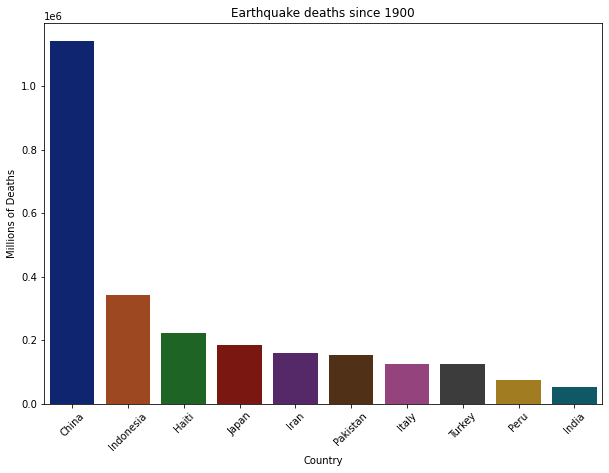

In [22]:
sns.set_palette('dark')
plt.figure(figsize=(10,7))
ax = sns.barplot(data=top_10_deadly,x='Present-day country and link to Wikipedia article',y='Deaths')
ax.set(ylabel='Millions of Deaths',xlabel='Country',title='Earthquake deaths since 1900')
plt.xticks(rotation=45,ha='center')
plt.show()

#MARKING THIS DOWN IN CASE I GET THE OTHER GRAPH FIGURED OUT

I want deaths y axis on the left and number of quakes axis on the right including 2 bars for each country using the following.

sns.set_palette('dark')
plt.figure(figsize=(10,7))
axa = sns.barplot(data=common_eq_df,x='Country',y='Number of earthquakes')
axa.set(ylabel='Millions of Deaths',xlabel='Country',title='Earthquake deaths since 1900')
plt.xticks(rotation=45,ha='center')
plt.show()

keep a list of which countries belong in which list for below as a reference:

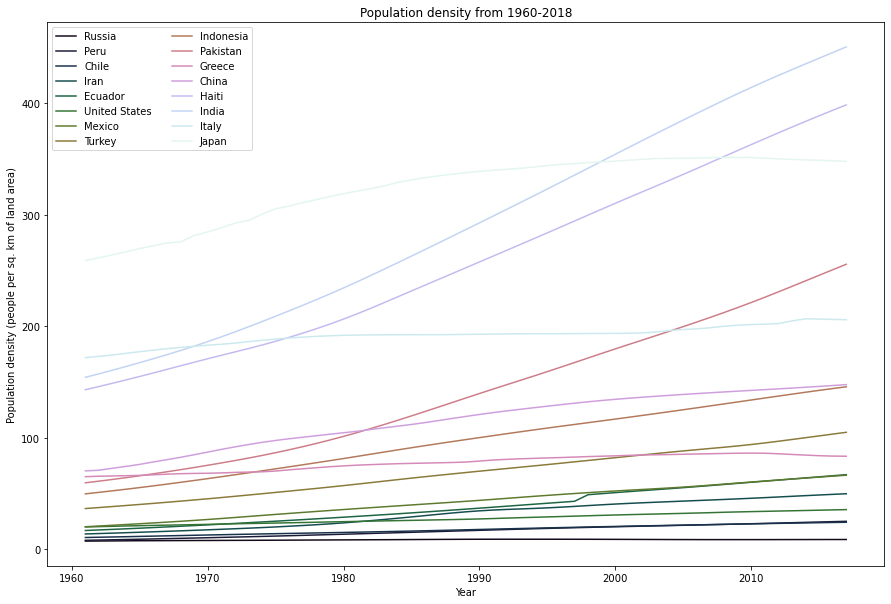

In [98]:
palette='cubehelix'
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=pop_density_needed,x='Year',y='Population density (people per sq. km of land area)', hue='Country',legend='brief',palette=palette)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],ncol=2)
ax.set_title('Population density from 1960-2018');

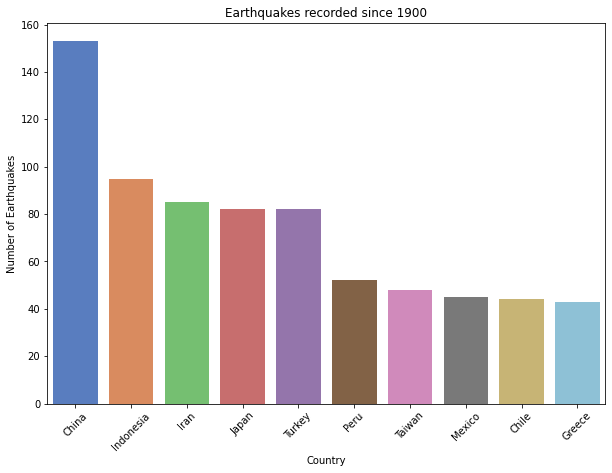

In [24]:
sns.set_palette('muted')
plt.figure(figsize=(10,7))
axb = sns.barplot(data=common_df,x='Country',y='Number of earthquakes')
axb.set(ylabel='Number of Earthquakes',xlabel='Country',title='Earthquakes recorded since 1900')
plt.xticks(rotation=45,ha='center')
plt.show()

In [25]:
#above goes on slide 5, already entered in

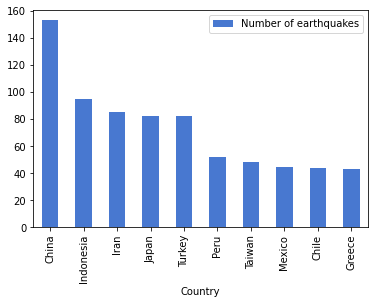

In [26]:
common_eq_df.head(10).plot(kind='bar',x='Country',y='Number of earthquakes');

In [27]:
#deadly_bar = plt.bar(x=top_10_deadly['Present-day country and link to Wikipedia article'], height=top_10_deadly['Deaths']);

In [28]:
#strongavg_bar = top_10_strongavg.plot(kind='bar',x='Present-day country and link to Wikipedia article',y='Magnitude');

In [29]:
#strong_bar = top_10_strong.plot(kind='bar',x='Present-day country and link to Wikipedia article',y='Magnitude');

In [30]:
#why does chile show up 3 times on the high mag high frequency quake lists but not the most deadly? they have some of the most training/preparation for earthquake evacuations

In [31]:
#there's a tectonic plate that iran, china, japan, and indonesia are all on which accounts for why they have so many earthquakes. china has been tracking earthquakes since 1300s which explains why their count is so much higher
dead_strong_count10

,Country,Number of earthquakes,Deaths,Magnitude
0,China,153,1141816.0,6.288889
1,Indonesia,95,343300.0,6.873684
2,Iran,85,160636.0,6.167059
3,Japan,82,182920.0,7.021951
4,Turkey,82,123027.0,6.276829
5,Peru,52,73933.0,6.776923
6,Taiwan,48,8030.0,6.656250
7,Mexico,45,14369.0,7.164444
8,Chile,44,39983.0,7.377273
9,Greece,43,1900.0,6.404651


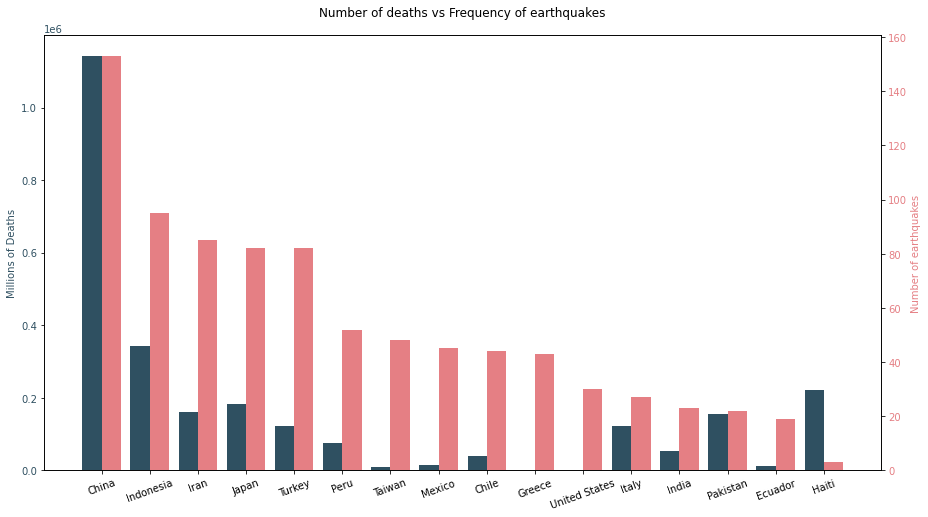

In [90]:
fig, ax1 = plt.subplots(figsize=(15,8))

x=deadly_count['Country']
t= deadly_count['Deaths']
tt = deadly_count['Number of earthquakes']
plt.xticks(rotation=20,ha='center')
plt.title('Number of deaths vs Frequency of earthquakes',y=1.03,color='black')


color= '#2f5061'
ax1.set_xlabel('')
ax1.set_ylabel('Millions of Deaths', color=color)
ax1.bar(x,t,color=color,width=-0.4,align='edge')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = '#e57f84'
ax2.set_ylabel('Number of earthquakes', color=color)
ax2.bar(x,tt,color=color,width=0.4,align='edge')
ax2.tick_params(axis='y', labelcolor=color);